In [2]:
# What is attrition?The definition of attrition means wearing down or wasting away, or the natural decline in the number of people working in an organization. 
# An example of attrition is a cliff face eroding due to rain and wind. An example of attrition is one army wearing down another throughout the course of a war.
# Dataset Link: https://www.kaggle.com/datasets/pavansubhasht/ibm-hr-analytics-attrition-dataset

# About Dataset

# Dataset set contains 34 predictor variables and 1 target variable
# We will try Uncover the factors that lead to employee attrition

# Importing necessary libraries

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load Dataset

In [122]:
df=pd.read_csv("employee_attrition.csv")

In [123]:
df

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1465,36,No,Travel_Frequently,884,Research & Development,23,2,Medical,1,2061,...,3,80,1,17,3,3,5,2,0,3
1466,39,No,Travel_Rarely,613,Research & Development,6,1,Medical,1,2062,...,1,80,1,9,5,3,7,7,1,7
1467,27,No,Travel_Rarely,155,Research & Development,4,3,Life Sciences,1,2064,...,2,80,1,6,0,3,6,2,0,3
1468,49,No,Travel_Frequently,1023,Sales,2,3,Medical,1,2065,...,4,80,0,17,3,2,9,6,0,8


In [124]:
df.isnull().sum()

Age                         0
Attrition                   0
BusinessTravel              0
DailyRate                   0
Department                  0
DistanceFromHome            0
Education                   0
EducationField              0
EmployeeCount               0
EmployeeNumber              0
EnvironmentSatisfaction     0
Gender                      0
HourlyRate                  0
JobInvolvement              0
JobLevel                    0
JobRole                     0
JobSatisfaction             0
MaritalStatus               0
MonthlyIncome               0
MonthlyRate                 0
NumCompaniesWorked          0
Over18                      0
OverTime                    0
PercentSalaryHike           0
PerformanceRating           0
RelationshipSatisfaction    0
StandardHours               0
StockOptionLevel            0
TotalWorkingYears           0
TrainingTimesLastYear       0
WorkLifeBalance             0
YearsAtCompany              0
YearsInCurrentRole          0
YearsSince

In [125]:
df.shape

(1470, 35)

In [126]:
df.describe(percentiles=[0.01,0.05,0.10,0.25,0.50,0.75,0.85,0.88,0.9,0.99])

,Age,DailyRate,DistanceFromHome,Education,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
count,1470.000000,1470.000000,1470.000000,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,...,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000
mean,36.923810,802.485714,9.192517,2.912925,1.0,1024.865306,2.721769,65.891156,2.729932,2.063946,...,2.712245,80.0,0.793878,11.279592,2.799320,2.761224,7.008163,4.229252,2.187755,4.123129
std,9.135373,403.509100,8.106864,1.024165,0.0,602.024335,1.093082,20.329428,0.711561,1.106940,...,1.081209,0.0,0.852077,7.780782,1.289271,0.706476,6.126525,3.623137,3.222430,3.568136
min,18.000000,102.000000,1.000000,1.000000,1.0,1.000000,1.000000,30.000000,1.000000,1.000000,...,1.000000,80.0,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
1%,19.000000,117.000000,1.000000,1.000000,1.0,19.690000,1.000000,30.000000,1.000000,1.000000,...,1.000000,80.0,0.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
5%,24.000000,165.350000,1.000000,1.000000,1.0,96.450000,1.000000,33.000000,1.000000,1.000000,...,1.000000,80.0,0.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000
10%,26.000000,242.800000,1.000000,1.000000,1.0,198.900000,1.000000,38.000000,2.000000,1.000000,...,1.000000,80.0,0.000000,3.000000,2.000000,2.000000,1.000000,0.000000,0.000000,0.000000
25%,30.000000,465.000000,2.000000,2.000000,1.0,491.250000,2.000000,48.000000,2.000000,1.000000,...,2.000000,80.0,0.000000,6.000000,2.000000,2.000000,3.000000,2.000000,0.000000,2.000000
50%,36.000000,802.000000,7.000000,3.000000,1.0,1020.500000,3.000000,66.000000,3.000000,2.000000,...,3.000000,80.0,1.000000,10.000000,3.000000,3.000000,5.000000,3.000000,1.000000,3.000000
75%,43.000000,1157.000000,14.000000,4.000000,1.0,1555.750000,4.000000,83.750000,3.000000,3.000000,...,4.000000,80.0,1.000000,15.000000,3.000000,3.000000,9.000000,7.000000,3.000000,7.000000


In [127]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       1470 non-null   int64 
 1   Attrition                 1470 non-null   object
 2   BusinessTravel            1470 non-null   object
 3   DailyRate                 1470 non-null   int64 
 4   Department                1470 non-null   object
 5   DistanceFromHome          1470 non-null   int64 
 6   Education                 1470 non-null   int64 
 7   EducationField            1470 non-null   object
 8   EmployeeCount             1470 non-null   int64 
 9   EmployeeNumber            1470 non-null   int64 
 10  EnvironmentSatisfaction   1470 non-null   int64 
 11  Gender                    1470 non-null   object
 12  HourlyRate                1470 non-null   int64 
 13  JobInvolvement            1470 non-null   int64 
 14  JobLevel                

In [128]:
df.isnull().sum()

Age                         0
Attrition                   0
BusinessTravel              0
DailyRate                   0
Department                  0
DistanceFromHome            0
Education                   0
EducationField              0
EmployeeCount               0
EmployeeNumber              0
EnvironmentSatisfaction     0
Gender                      0
HourlyRate                  0
JobInvolvement              0
JobLevel                    0
JobRole                     0
JobSatisfaction             0
MaritalStatus               0
MonthlyIncome               0
MonthlyRate                 0
NumCompaniesWorked          0
Over18                      0
OverTime                    0
PercentSalaryHike           0
PerformanceRating           0
RelationshipSatisfaction    0
StandardHours               0
StockOptionLevel            0
TotalWorkingYears           0
TrainingTimesLastYear       0
WorkLifeBalance             0
YearsAtCompany              0
YearsInCurrentRole          0
YearsSince

In [130]:
df.isnull().values.any()

False

In [131]:
data = df.drop(['Attrition'],axis=1)
target = df[['Attrition']]

In [132]:
target['Attrition'] = np.where(target['Attrition'] == 'Yes',1,0)

C:\Users\antar\AppData\Local\Temp/ipykernel_36008/2318074213.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  target['Attrition'] = np.where(target['Attrition'] == 'Yes',1,0)


In [133]:
target.head()

,Attrition
0,1
1,0
2,1
3,0
4,0


# Data Cleaning

In [134]:
data = data.drop(['EmployeeNumber'],axis=1)

In [150]:
num = data.select_dtypes(include='integer')
char = data.select_dtypes(include='object')

In [151]:
num.head()

,Age,DailyRate,DistanceFromHome,Education,EmployeeCount,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,JobSatisfaction,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,1102,1,2,1,2,94,3,2,4,...,1,80,0,8,0,1,6,4,0,5
1,49,279,8,1,1,3,61,2,2,2,...,4,80,1,10,3,3,10,7,1,7
2,37,1373,2,2,1,4,92,2,1,3,...,2,80,0,7,3,3,0,0,0,0
3,33,1392,3,4,1,4,56,3,1,3,...,3,80,0,8,3,3,8,7,3,0
4,27,591,2,1,1,1,40,3,1,2,...,4,80,1,6,3,3,2,2,2,2


In [152]:
char.head()

,BusinessTravel,Department,EducationField,Gender,JobRole,MaritalStatus,Over18,OverTime
0,Travel_Rarely,Sales,Life Sciences,Female,Sales Executive,Single,Y,Yes
1,Travel_Frequently,Research & Development,Life Sciences,Male,Research Scientist,Married,Y,No
2,Travel_Rarely,Research & Development,Other,Male,Laboratory Technician,Single,Y,Yes
3,Travel_Frequently,Research & Development,Life Sciences,Female,Research Scientist,Married,Y,Yes
4,Travel_Rarely,Research & Development,Medical,Male,Laboratory Technician,Married,Y,No


In [138]:
def unique_levels(data):
    data = data.value_counts().count()
    return data

In [139]:
data_value_counts = pd.DataFrame(num.apply(lambda data : unique_levels(data)))

In [140]:
data_value_counts.columns = ['feature_levels']
data_value_counts

,feature_levels
Age,43
DailyRate,886
DistanceFromHome,29
Education,5
EmployeeCount,1
EnvironmentSatisfaction,4
HourlyRate,71
JobInvolvement,4
JobLevel,5
JobSatisfaction,4


In [141]:
cat_slice = data_value_counts.loc[data_value_counts['feature_levels']<=20]
cat_list = cat_slice.index
cat = num.loc[:,cat_list]

In [142]:
cat

,Education,EmployeeCount,EnvironmentSatisfaction,JobInvolvement,JobLevel,JobSatisfaction,NumCompaniesWorked,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StandardHours,StockOptionLevel,TrainingTimesLastYear,WorkLifeBalance,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,2,1,2,3,2,4,8,11,3,1,80,0,0,1,4,0,5
1,1,1,3,2,2,2,1,23,4,4,80,1,3,3,7,1,7
2,2,1,4,2,1,3,6,15,3,2,80,0,3,3,0,0,0
3,4,1,4,3,1,3,1,11,3,3,80,0,3,3,7,3,0
4,1,1,1,3,1,2,9,12,3,4,80,1,3,3,2,2,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1465,2,1,3,4,2,4,4,17,3,3,80,1,3,3,2,0,3
1466,1,1,4,2,3,1,4,15,3,1,80,1,5,3,7,1,7
1467,3,1,2,4,2,2,1,20,4,2,80,1,0,3,2,0,3
1468,3,1,4,2,2,2,2,14,3,4,80,0,3,2,6,0,8


In [143]:
num

,Age,DailyRate,DistanceFromHome,Education,EmployeeCount,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,JobSatisfaction,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,1102,1,2,1,2,94,3,2,4,...,1,80,0,8,0,1,6,4,0,5
1,49,279,8,1,1,3,61,2,2,2,...,4,80,1,10,3,3,10,7,1,7
2,37,1373,2,2,1,4,92,2,1,3,...,2,80,0,7,3,3,0,0,0,0
3,33,1392,3,4,1,4,56,3,1,3,...,3,80,0,8,3,3,8,7,3,0
4,27,591,2,1,1,1,40,3,1,2,...,4,80,1,6,3,3,2,2,2,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1465,36,884,23,2,1,3,41,4,2,4,...,3,80,1,17,3,3,5,2,0,3
1466,39,613,6,1,1,4,42,2,3,1,...,1,80,1,9,5,3,7,7,1,7
1467,27,155,4,3,1,2,87,4,2,2,...,2,80,1,6,0,3,6,2,0,3
1468,49,1023,2,3,1,4,63,2,2,2,...,4,80,0,17,3,2,9,6,0,8


In [157]:
num_slice = data_value_counts.loc[data_value_counts['feature_levels']>20]
num_list = num_slice.index
num = num.loc[:,num_list]

In [158]:
num

,Age,DailyRate,DistanceFromHome,HourlyRate,MonthlyIncome,MonthlyRate,TotalWorkingYears,YearsAtCompany
0,41,1102,1,94,5993,19479,8,6
1,49,279,8,61,5130,24907,10,10
2,37,1373,2,92,2090,2396,7,0
3,33,1392,3,56,2909,23159,8,8
4,27,591,2,40,3468,16632,6,2
...,...,...,...,...,...,...,...,...
1465,36,884,23,41,2571,12290,17,5
1466,39,613,6,42,9991,21457,9,7
1467,27,155,4,87,6142,5174,6,6
1468,49,1023,2,63,5390,13243,17,9


In [153]:
char

,BusinessTravel,Department,EducationField,Gender,JobRole,MaritalStatus,Over18,OverTime
0,Travel_Rarely,Sales,Life Sciences,Female,Sales Executive,Single,Y,Yes
1,Travel_Frequently,Research & Development,Life Sciences,Male,Research Scientist,Married,Y,No
2,Travel_Rarely,Research & Development,Other,Male,Laboratory Technician,Single,Y,Yes
3,Travel_Frequently,Research & Development,Life Sciences,Female,Research Scientist,Married,Y,Yes
4,Travel_Rarely,Research & Development,Medical,Male,Laboratory Technician,Married,Y,No
...,...,...,...,...,...,...,...,...
1465,Travel_Frequently,Research & Development,Medical,Male,Laboratory Technician,Married,Y,No
1466,Travel_Rarely,Research & Development,Medical,Male,Healthcare Representative,Married,Y,No
1467,Travel_Rarely,Research & Development,Life Sciences,Male,Manufacturing Director,Married,Y,Yes
1468,Travel_Frequently,Sales,Medical,Male,Sales Executive,Married,Y,No


In [154]:
char = pd.concat([char,cat],axis=1,join="inner")

In [155]:
char

,BusinessTravel,Department,EducationField,Gender,JobRole,MaritalStatus,Over18,OverTime,Education,EmployeeCount,...,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StandardHours,StockOptionLevel,TrainingTimesLastYear,WorkLifeBalance,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,Travel_Rarely,Sales,Life Sciences,Female,Sales Executive,Single,Y,Yes,2,1,...,11,3,1,80,0,0,1,4,0,5
1,Travel_Frequently,Research & Development,Life Sciences,Male,Research Scientist,Married,Y,No,1,1,...,23,4,4,80,1,3,3,7,1,7
2,Travel_Rarely,Research & Development,Other,Male,Laboratory Technician,Single,Y,Yes,2,1,...,15,3,2,80,0,3,3,0,0,0
3,Travel_Frequently,Research & Development,Life Sciences,Female,Research Scientist,Married,Y,Yes,4,1,...,11,3,3,80,0,3,3,7,3,0
4,Travel_Rarely,Research & Development,Medical,Male,Laboratory Technician,Married,Y,No,1,1,...,12,3,4,80,1,3,3,2,2,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1465,Travel_Frequently,Research & Development,Medical,Male,Laboratory Technician,Married,Y,No,2,1,...,17,3,3,80,1,3,3,2,0,3
1466,Travel_Rarely,Research & Development,Medical,Male,Healthcare Representative,Married,Y,No,1,1,...,15,3,1,80,1,5,3,7,1,7
1467,Travel_Rarely,Research & Development,Life Sciences,Male,Manufacturing Director,Married,Y,Yes,3,1,...,20,4,2,80,1,0,3,2,0,3
1468,Travel_Frequently,Sales,Medical,Male,Sales Executive,Married,Y,No,3,1,...,14,3,4,80,0,3,2,6,0,8


In [159]:
num

,Age,DailyRate,DistanceFromHome,HourlyRate,MonthlyIncome,MonthlyRate,TotalWorkingYears,YearsAtCompany
0,41,1102,1,94,5993,19479,8,6
1,49,279,8,61,5130,24907,10,10
2,37,1373,2,92,2090,2396,7,0
3,33,1392,3,56,2909,23159,8,8
4,27,591,2,40,3468,16632,6,2
...,...,...,...,...,...,...,...,...
1465,36,884,23,41,2571,12290,17,5
1466,39,613,6,42,9991,21457,9,7
1467,27,155,4,87,6142,5174,6,6
1468,49,1023,2,63,5390,13243,17,9


In [147]:
from sklearn.feature_selection import VarianceThreshold

varselector = VarianceThreshold(threshold=0) #Less than 5 and more than 35 can remove
varselector.fit_transform(num)
num_cols = varselector.get_support(indices=True)
num_cols

array([0, 1, 2, 3, 4, 5, 6, 7], dtype=int64)

In [160]:
num_cols

array([0, 1, 2, 3, 4, 5, 6, 7], dtype=int64)

In [166]:
char

,BusinessTravel,Department,EducationField,Gender,JobRole,MaritalStatus,Over18,OverTime,Education,EmployeeCount,...,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StandardHours,StockOptionLevel,TrainingTimesLastYear,WorkLifeBalance,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,Travel_Rarely,Sales,Life Sciences,Female,Sales Executive,Single,Y,Yes,2,1,...,11,3,1,80,0,0,1,4,0,5
1,Travel_Frequently,Research & Development,Life Sciences,Male,Research Scientist,Married,Y,No,1,1,...,23,4,4,80,1,3,3,7,1,7
2,Travel_Rarely,Research & Development,Other,Male,Laboratory Technician,Single,Y,Yes,2,1,...,15,3,2,80,0,3,3,0,0,0
3,Travel_Frequently,Research & Development,Life Sciences,Female,Research Scientist,Married,Y,Yes,4,1,...,11,3,3,80,0,3,3,7,3,0
4,Travel_Rarely,Research & Development,Medical,Male,Laboratory Technician,Married,Y,No,1,1,...,12,3,4,80,1,3,3,2,2,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1465,Travel_Frequently,Research & Development,Medical,Male,Laboratory Technician,Married,Y,No,2,1,...,17,3,3,80,1,3,3,2,0,3
1466,Travel_Rarely,Research & Development,Medical,Male,Healthcare Representative,Married,Y,No,1,1,...,15,3,1,80,1,5,3,7,1,7
1467,Travel_Rarely,Research & Development,Life Sciences,Male,Manufacturing Director,Married,Y,Yes,3,1,...,20,4,2,80,1,0,3,2,0,3
1468,Travel_Frequently,Sales,Medical,Male,Sales Executive,Married,Y,No,3,1,...,14,3,4,80,0,3,2,6,0,8


In [172]:
char.describe()

,Education,EmployeeCount,EnvironmentSatisfaction,JobInvolvement,JobLevel,JobSatisfaction,NumCompaniesWorked,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StandardHours,StockOptionLevel,TrainingTimesLastYear,WorkLifeBalance,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
count,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000
mean,2.912925,1.0,2.721769,2.729932,2.063946,2.728571,2.693197,15.209524,3.153741,2.712245,80.0,0.793878,2.799320,2.761224,4.229252,2.187755,4.123129
std,1.024165,0.0,1.093082,0.711561,1.106940,1.102846,2.498009,3.659938,0.360824,1.081209,0.0,0.852077,1.289271,0.706476,3.623137,3.222430,3.568136
min,1.000000,1.0,1.000000,1.000000,1.000000,1.000000,0.000000,11.000000,3.000000,1.000000,80.0,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000
25%,2.000000,1.0,2.000000,2.000000,1.000000,2.000000,1.000000,12.000000,3.000000,2.000000,80.0,0.000000,2.000000,2.000000,2.000000,0.000000,2.000000
50%,3.000000,1.0,3.000000,3.000000,2.000000,3.000000,2.000000,14.000000,3.000000,3.000000,80.0,1.000000,3.000000,3.000000,3.000000,1.000000,3.000000
75%,4.000000,1.0,4.000000,3.000000,3.000000,4.000000,4.000000,18.000000,3.000000,4.000000,80.0,1.000000,3.000000,3.000000,7.000000,3.000000,7.000000
max,5.000000,1.0,4.000000,4.000000,5.000000,4.000000,9.000000,25.000000,4.000000,4.000000,80.0,3.000000,6.000000,4.000000,18.000000,15.000000,17.000000


In [173]:
# # Inspecting char
# char.apply(pd.value_counts)

In [174]:
# We notice EmployeeCount and StandardHours have 0 variance so no predictive power.We drop them

In [175]:
char = char.drop(['EmployeeCount','StandardHours'],axis=1)

In [176]:
num.head()

,Age,DailyRate,DistanceFromHome,HourlyRate,MonthlyIncome,MonthlyRate,TotalWorkingYears,YearsAtCompany
0,41,1102,1,94,5993,19479,8,6
1,49,279,8,61,5130,24907,10,10
2,37,1373,2,92,2090,2396,7,0
3,33,1392,3,56,2909,23159,8,8
4,27,591,2,40,3468,16632,6,2


In [177]:
char.head()

,BusinessTravel,Department,EducationField,Gender,JobRole,MaritalStatus,Over18,OverTime,Education,EnvironmentSatisfaction,...,NumCompaniesWorked,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TrainingTimesLastYear,WorkLifeBalance,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,Travel_Rarely,Sales,Life Sciences,Female,Sales Executive,Single,Y,Yes,2,2,...,8,11,3,1,0,0,1,4,0,5
1,Travel_Frequently,Research & Development,Life Sciences,Male,Research Scientist,Married,Y,No,1,3,...,1,23,4,4,1,3,3,7,1,7
2,Travel_Rarely,Research & Development,Other,Male,Laboratory Technician,Single,Y,Yes,2,4,...,6,15,3,2,0,3,3,0,0,0
3,Travel_Frequently,Research & Development,Life Sciences,Female,Research Scientist,Married,Y,Yes,4,4,...,1,11,3,3,0,3,3,7,3,0
4,Travel_Rarely,Research & Development,Medical,Male,Laboratory Technician,Married,Y,No,1,1,...,9,12,3,4,1,3,3,2,2,2


# Outlier Removal

In [178]:
def outlier_cap(data):
  data=data.clip(lower=data.quantile(0.01))
  data=data.clip(upper=data.quantile(0.99))
  return data

In [179]:
num = num.apply(lambda data : outlier_cap(data))

In [180]:
num.describe(percentiles=[0.01,0.05,0.10,0.25,0.50,0.75,0.85,0.88,0.9,0.99])

,Age,DailyRate,DistanceFromHome,HourlyRate,MonthlyIncome,MonthlyRate,TotalWorkingYears,YearsAtCompany
count,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000
mean,36.918810,802.482993,9.192517,65.891156,6503.407177,14312.602483,11.268707,6.980272
std,9.099146,403.260237,8.106864,20.329428,4700.530849,7112.052810,7.710507,6.004901
min,19.000000,117.000000,1.000000,30.000000,1382.460000,2325.070000,1.000000,0.000000
1%,19.000000,117.000000,1.000000,30.000000,1389.732600,2325.711700,1.000000,0.000000
5%,24.000000,165.350000,1.000000,33.000000,2097.900000,3384.550000,1.000000,1.000000
10%,26.000000,242.800000,1.000000,38.000000,2317.600000,4603.000000,3.000000,1.000000
25%,30.000000,465.000000,2.000000,48.000000,2911.000000,8047.000000,6.000000,3.000000
50%,36.000000,802.000000,7.000000,66.000000,4919.000000,14235.500000,10.000000,5.000000
75%,43.000000,1157.000000,14.000000,83.750000,8379.000000,20461.500000,15.000000,9.000000


# Data Visualization

In [189]:
data

,Age,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EnvironmentSatisfaction,Gender,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,2,Female,...,1,80,0,8,0,1,6,4,0,5
1,49,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,3,Male,...,4,80,1,10,3,3,10,7,1,7
2,37,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,Male,...,2,80,0,7,3,3,0,0,0,0
3,33,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,4,Female,...,3,80,0,8,3,3,8,7,3,0
4,27,Travel_Rarely,591,Research & Development,2,1,Medical,1,1,Male,...,4,80,1,6,3,3,2,2,2,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1465,36,Travel_Frequently,884,Research & Development,23,2,Medical,1,3,Male,...,3,80,1,17,3,3,5,2,0,3
1466,39,Travel_Rarely,613,Research & Development,6,1,Medical,1,4,Male,...,1,80,1,9,5,3,7,7,1,7
1467,27,Travel_Rarely,155,Research & Development,4,3,Life Sciences,1,2,Male,...,2,80,1,6,0,3,6,2,0,3
1468,49,Travel_Frequently,1023,Sales,2,3,Medical,1,4,Male,...,4,80,0,17,3,2,9,6,0,8


In [181]:
data_combined = pd.concat([data,target],axis=1,join='inner')

<AxesSubplot:>

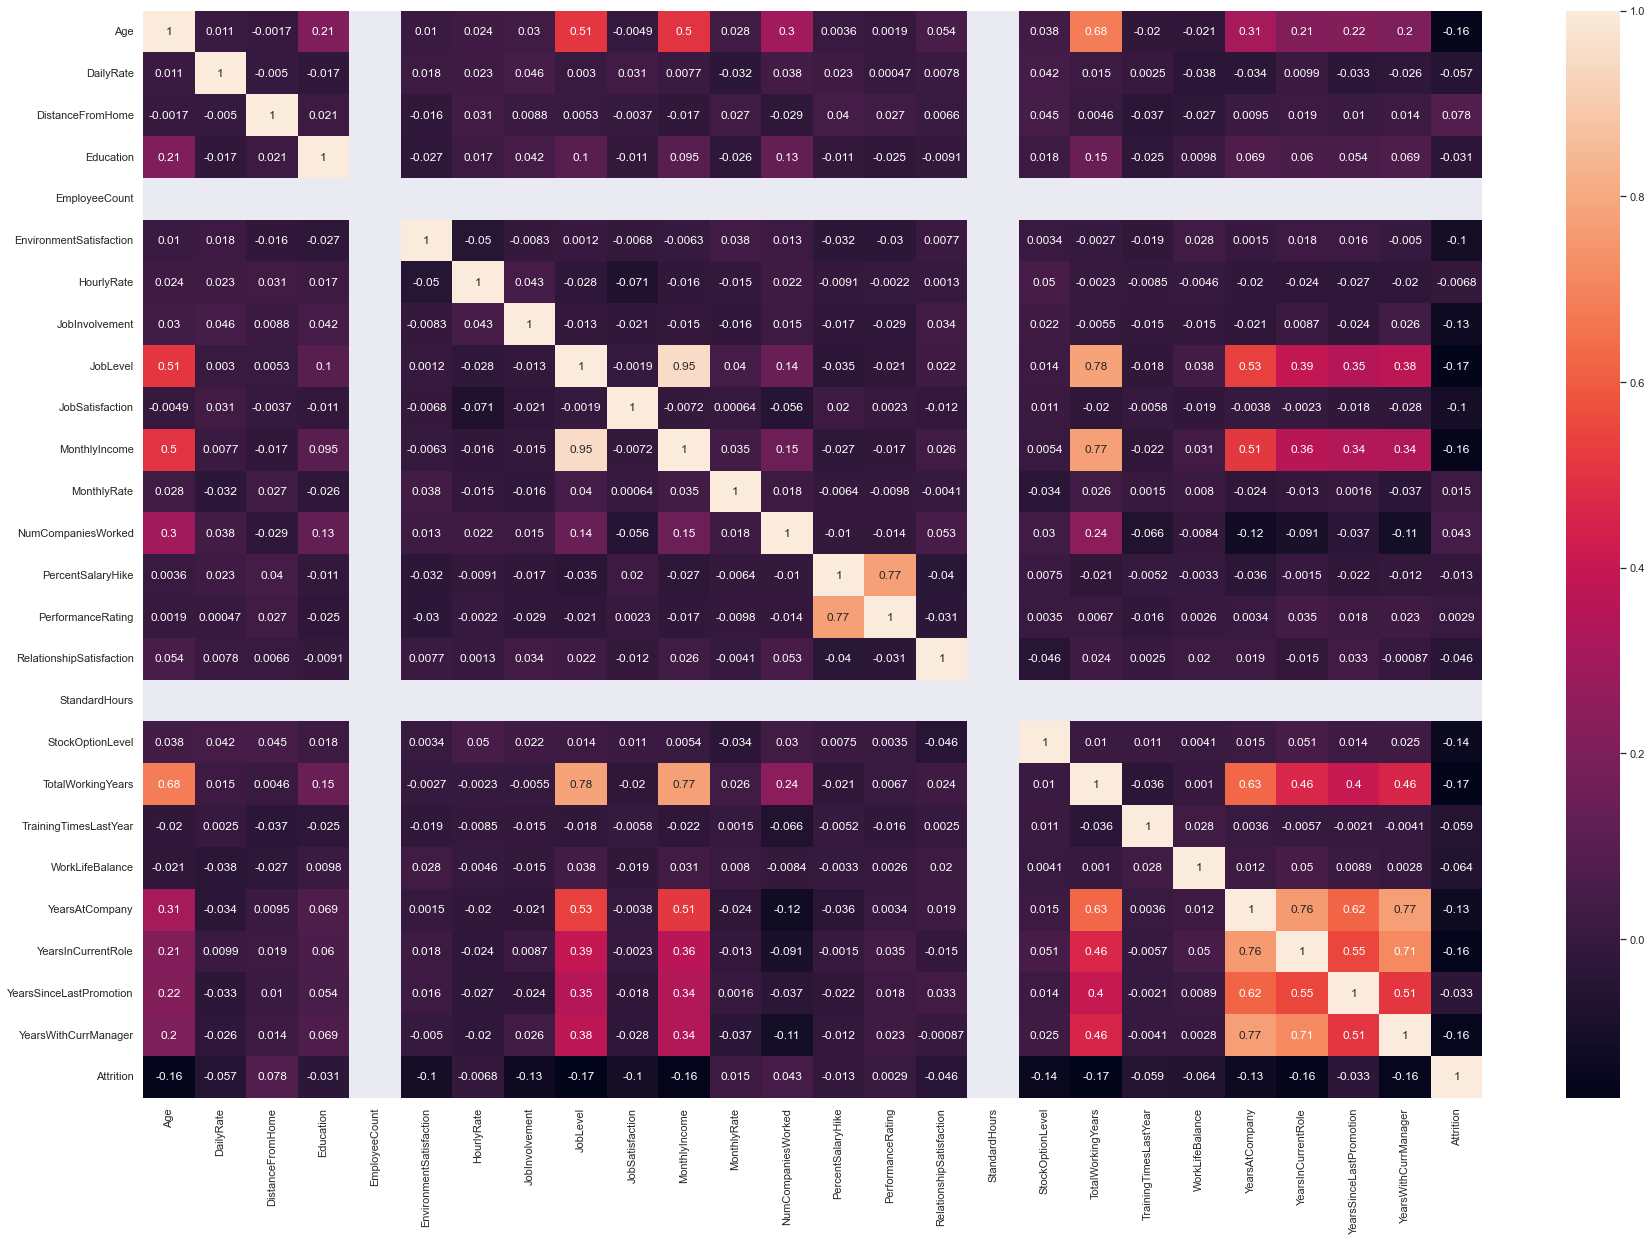

In [33]:
sns.set(rc = {'figure.figsize':(30,20)})
sns.heatmap(data_combined.corr(),annot=True)

In [34]:
def correlation(dataset,threshold):
  col_corr = set()
  corr_matrix = dataset.corr()
  for i in range(len(corr_matrix.columns)):
    for j in range(i):
      if abs(corr_matrix.iloc[i,j]) > threshold:
        colname = corr_matrix.columns[i]
        col_corr.add(colname)
  return col_corr

In [35]:
corr_features = correlation(data_combined,0.75)
# Greater than 0.75 correlation can be removed

In [36]:
corr_features

{'MonthlyIncome',
 'PerformanceRating',
 'TotalWorkingYears',
 'YearsInCurrentRole',
 'YearsWithCurrManager'}

In [37]:
num = num.drop(['MonthlyIncome','TotalWorkingYears'],axis=1)
char = char.drop(['PerformanceRating','YearsInCurrentRole','YearsWithCurrManager'],axis=1)

In [38]:
sns.set(rc = {'figure.figsize':(7,5)})

# Data Transforming

In [39]:
from sklearn.preprocessing import KBinsDiscretizer

discrete=KBinsDiscretizer(n_bins=10,encode='ordinal', strategy='quantile')
num_binned=pd.DataFrame(discrete.fit_transform(num),index=num.index, columns=num.columns).add_suffix('_Rank')

d:\ProgramData\Anaconda3\lib\site-packages\sklearn\preprocessing\_discretization.py:291: UserWarning: Bins whose width are too small (i.e., <= 1e-8) in feature 2 are removed. Consider decreasing the number of bins.
  warnings.warn(
d:\ProgramData\Anaconda3\lib\site-packages\sklearn\preprocessing\_discretization.py:291: UserWarning: Bins whose width are too small (i.e., <= 1e-8) in feature 5 are removed. Consider decreasing the number of bins.
  warnings.warn(


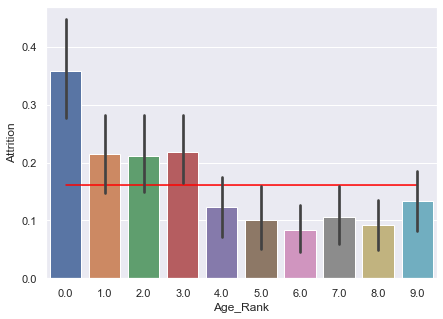

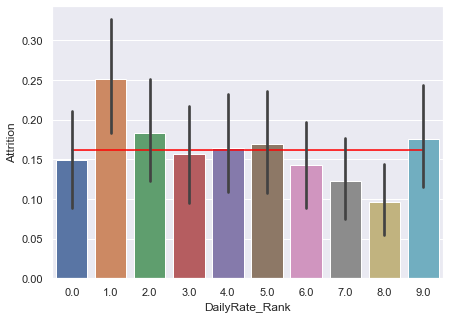

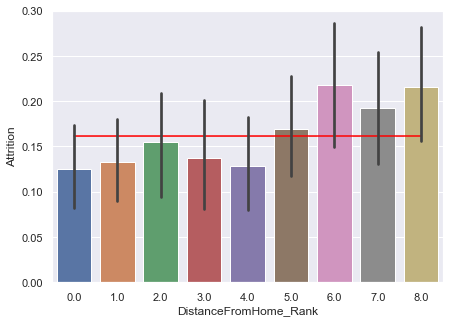

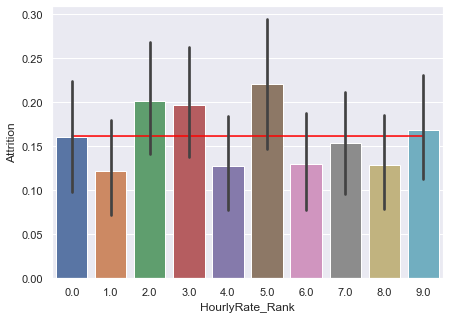

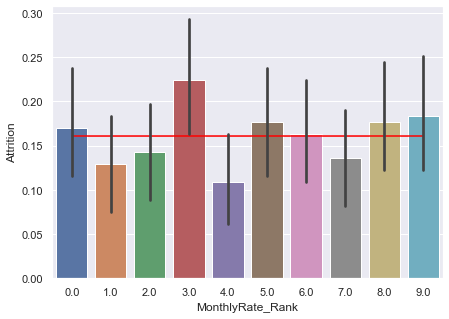

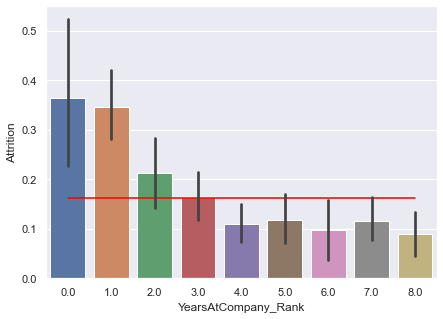

In [40]:
num_bin_combined=pd.concat([num_binned,target],axis=1,join='inner')

from numpy import mean

for col in (num_binned.columns):
    plt.figure()
    sns.lineplot(x=col,y=num_bin_combined['Attrition'].mean(),data=num_bin_combined,color='red')
    sns.barplot(x=col,y='Attrition',data=num_bin_combined,estimator=mean )
plt.show()

In [41]:
num.head()

,Age,DailyRate,DistanceFromHome,HourlyRate,MonthlyRate,YearsAtCompany
0,41.0,1102.0,1,94,19479.0,6.0
1,49.0,279.0,8,61,24907.0,10.0
2,37.0,1373.0,2,92,2396.0,0.0
3,33.0,1392.0,3,56,23159.0,8.0
4,27.0,591.0,2,40,16632.0,2.0


In [42]:
num_bin_combined.head()

,Age_Rank,DailyRate_Rank,DistanceFromHome_Rank,HourlyRate_Rank,MonthlyRate_Rank,YearsAtCompany_Rank,Attrition
0,7.0,7.0,0.0,9.0,7.0,4.0,1
1,8.0,1.0,4.0,4.0,9.0,7.0,0
2,5.0,9.0,1.0,8.0,0.0,0.0,1
3,3.0,9.0,2.0,3.0,8.0,5.0,0
4,1.0,3.0,1.0,1.0,5.0,2.0,0


In [43]:
num_bin_combined.groupby(by='Age_Rank')['Attrition'].sum()

Age_Rank
0.0    44
1.0    29
2.0    27
3.0    41
4.0    19
5.0    12
6.0    13
7.0    16
8.0    13
9.0    23
Name: Attrition, dtype: int32

In [44]:
cond_list = [(num_binned['Age_Rank'].isin([0.0,3.0])),
             (num_binned['Age_Rank'].isin([1.0,2.0])),
             (num_binned['Age_Rank']>=4.0)]
choice_list = ['High Attrition Age','Mid Attrition Age','Low Attrition Age']
char['Age_Category'] = np.select(cond_list,choice_list)

In [45]:
num_bin_combined.groupby(by='DailyRate_Rank')['Attrition'].sum()

DailyRate_Rank
0.0    22
1.0    37
2.0    27
3.0    23
4.0    24
5.0    25
6.0    21
7.0    18
8.0    14
9.0    26
Name: Attrition, dtype: int32

In [46]:
cond_list = [(num_binned['DailyRate_Rank']==1.0),
             (num_binned['DailyRate_Rank'].isin([2.0,4.0,5.0,9.0])),
             (num_binned['DailyRate_Rank'].isin([0.0,3.0,6.0,7.0,8.0]))]
choice_list = ['High Attrition DailyRate','Mid Attrition DailyRate','Low Attrition DailyRate']
char['DailyRate_Category'] = np.select(cond_list,choice_list)

In [47]:
num_bin_combined.groupby(by='DistanceFromHome_Rank')['Attrition'].sum()

DistanceFromHome_Rank
0.0    26
1.0    28
2.0    23
3.0    17
4.0    21
5.0    29
6.0    32
7.0    25
8.0    36
Name: Attrition, dtype: int32

In [48]:
cond_list = [(num_binned['DistanceFromHome_Rank'].isin([6.0,8.0])),
             (num_binned['DistanceFromHome_Rank'].isin([0.0,1.0,5.0,7.0])),
             (num_binned['DistanceFromHome_Rank'].isin([2.0,3.0,4.0]))]
choice_list = ['High Attrition DistanceFromHome','Mid Attrition DistanceFromHome','Low Attrition DistanceFromHome']
char['DistanceFromHome_Category'] = np.select(cond_list,choice_list)

In [49]:
num_bin_combined.groupby(by='HourlyRate_Rank')['Attrition'].sum()

HourlyRate_Rank
0.0    23
1.0    17
2.0    30
3.0    30
4.0    18
5.0    30
6.0    20
7.0    24
8.0    18
9.0    27
Name: Attrition, dtype: int32

In [50]:
cond_list = [(num_binned['HourlyRate_Rank'].isin([2.0,3.0,5.0])),
             (num_binned['HourlyRate_Rank'].isin([0.0,7.0,9.0])),
             (num_binned['HourlyRate_Rank'].isin([1.0,4.0,6.0,8.0]))]
choice_list = ['High Attrition HourlyRate','Mid Attrition HourlyRate','Low Attrition HourlyRate']
char['HourlyRate_Category'] = np.select(cond_list,choice_list)

In [51]:
num_bin_combined.groupby(by='MonthlyRate_Rank')['Attrition'].sum()

MonthlyRate_Rank
0.0    25
1.0    19
2.0    21
3.0    33
4.0    16
5.0    26
6.0    24
7.0    20
8.0    26
9.0    27
Name: Attrition, dtype: int32

In [52]:
cond_list = [(num_binned['MonthlyRate_Rank'].isin([3.0])),
             (num_binned['MonthlyRate_Rank'].isin([0.0,5.0,6.0,8.0,9.0])),
             (num_binned['MonthlyRate_Rank'].isin([1.0,2.0,4.0,7.0]))]
choice_list = ['High Attrition MonthlyRate','Mid Attrition MonthlyRate','Low Attrition MonthlyRate']
char['MonthlyRate_Category'] = np.select(cond_list,choice_list)

In [53]:
num_bin_combined.groupby(by='YearsAtCompany_Rank')['Attrition'].sum()

YearsAtCompany_Rank
0.0    16
1.0    59
2.0    27
3.0    39
4.0    30
5.0    20
6.0     8
7.0    24
8.0    14
Name: Attrition, dtype: int32

In [54]:
cond_list = [(num_binned['YearsAtCompany_Rank'].isin([1.0])),
             (num_binned['YearsAtCompany_Rank'].isin([2.0,3.0,4.0])),
             (num_binned['YearsAtCompany_Rank'].isin([0.0,5.0,6.0,7.0,8.0]))]
choice_list = ['High Attrition YearsAtCompany','Mid Attrition YearsAtCompany','Low Attrition YearsAtCompany']
char['YearsAtCompany_Category'] = np.select(cond_list,choice_list)

C:\Users\antar\AppData\Local\Temp/ipykernel_36008/837962914.py:6: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  plt.figure()


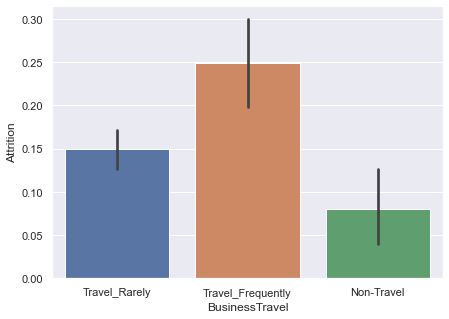

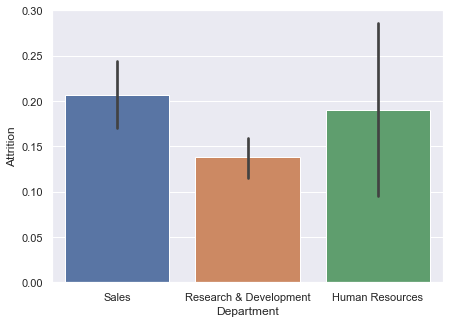

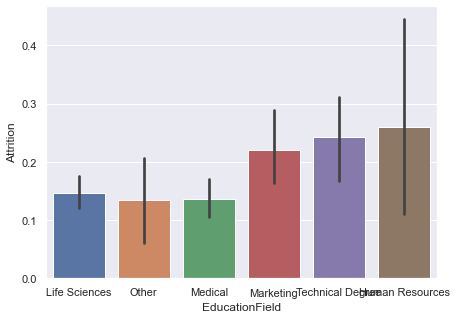

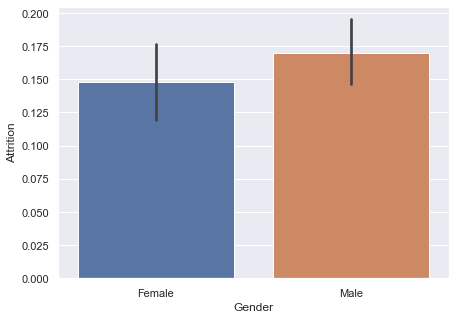

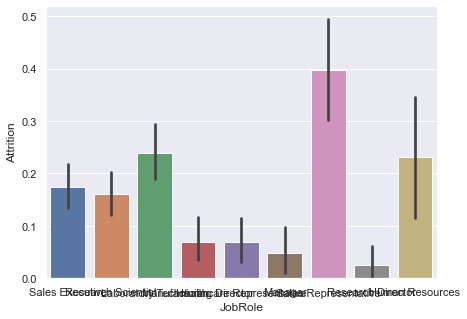

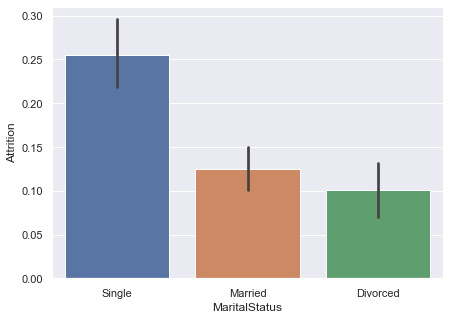

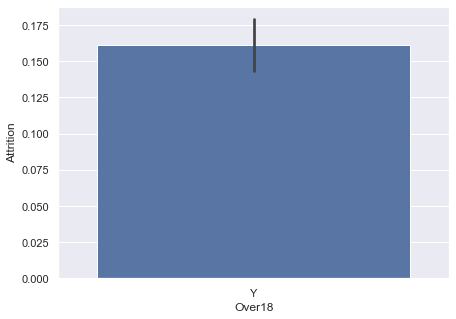

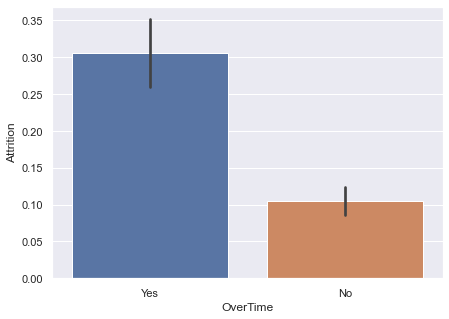

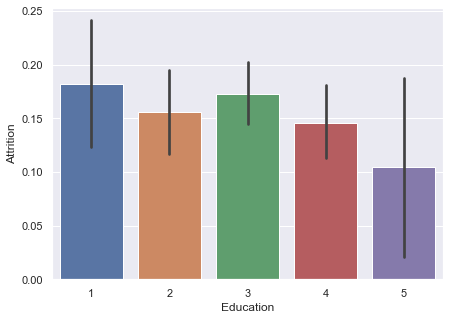

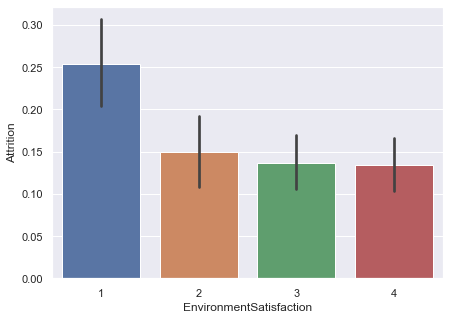

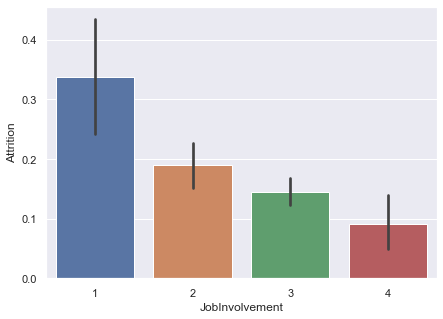

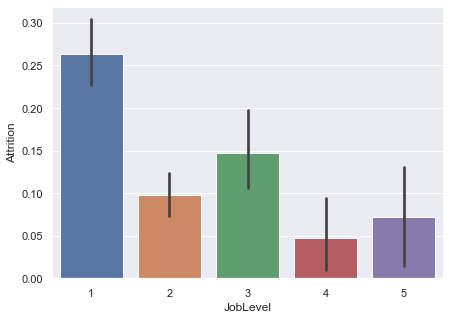

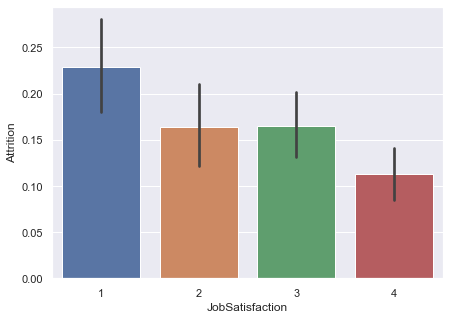

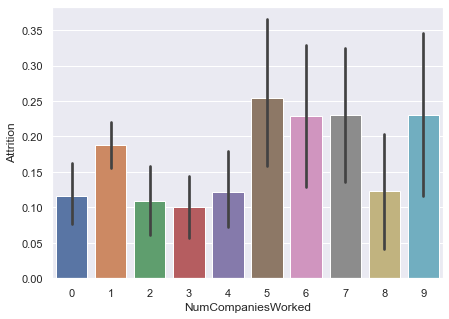

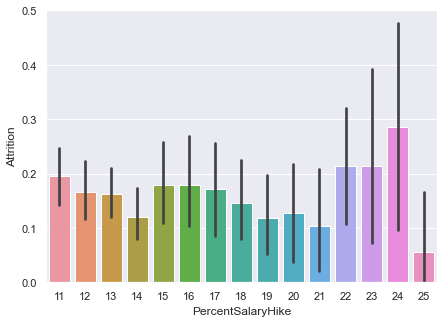

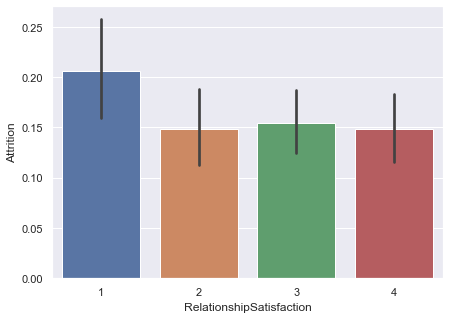

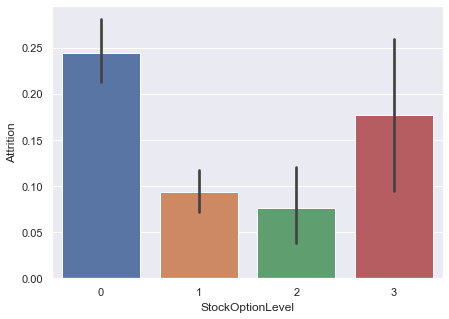

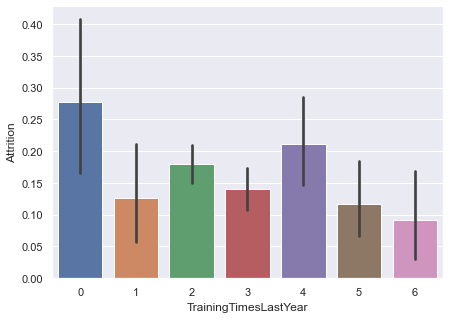

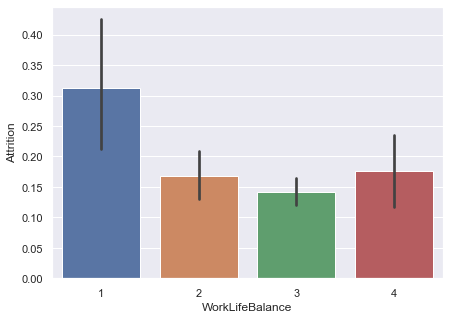

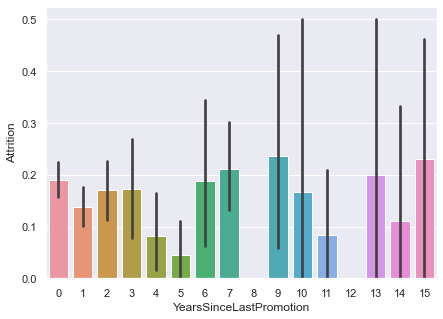

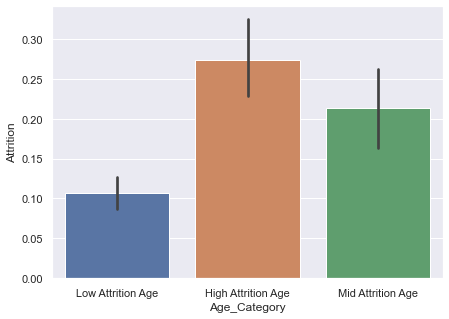

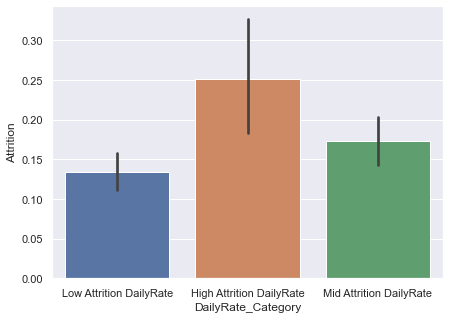

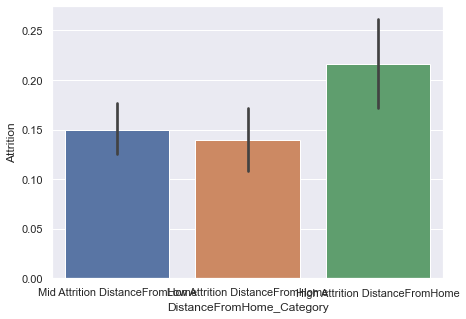

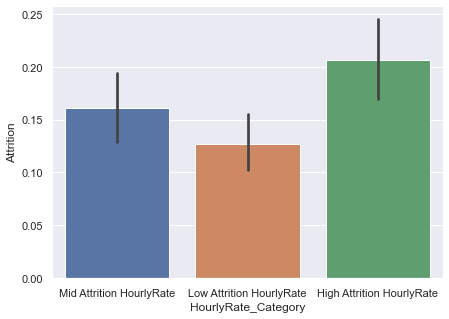

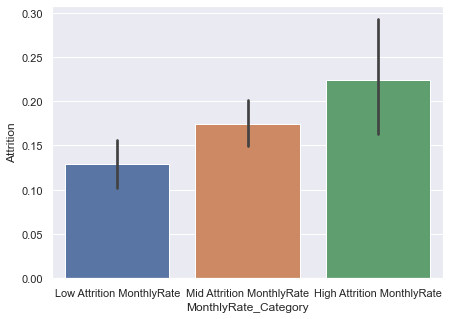

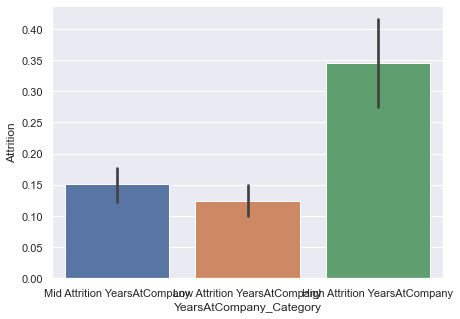

In [55]:
char_combined=pd.concat([char,target],axis=1,join='inner')

from numpy import mean

for col in (char.columns):
    plt.figure()
    sns.barplot(x=col, y="Attrition",data=char_combined,estimator=mean)
plt.show()

In [56]:
char = char.drop(['Over18','Gender'],axis=1)

In [57]:
char_combined.groupby(by='PercentSalaryHike')['Attrition'].sum()

PercentSalaryHike
11    41
12    33
13    34
14    24
15    18
16    14
17    14
18    13
19     9
20     7
21     5
22    12
23     6
24     6
25     1
Name: Attrition, dtype: int32

In [58]:
cond_list = [(char_combined['PercentSalaryHike'].isin([11,12,13])),
             (char_combined['PercentSalaryHike'].isin([14,15])),
             (char_combined['PercentSalaryHike'].isin([16,17,18,19,20,21,22,23,24,25]))]
choice_list = ['High Attrition PercentSalaryHike','Mid Attrition PercentSalaryHike','Low Attrition PercentSalaryHike']
char['PercentSalaryHike_Category'] = np.select(cond_list,choice_list)

In [59]:
char_combined.groupby(by='YearsSinceLastPromotion')['Attrition'].sum()

YearsSinceLastPromotion
0     110
1      49
2      27
3       9
4       5
5       2
6       6
7      16
8       0
9       4
10      1
11      2
12      0
13      2
14      1
15      3
Name: Attrition, dtype: int32

In [60]:
cond_list = [(char_combined['YearsSinceLastPromotion'].isin([0])),
             (char_combined['YearsSinceLastPromotion'].isin([1,2,7])),
             (char_combined['YearsSinceLastPromotion'].isin([3,4,5,6,8,9,10,11,12,13,14,15]))]
choice_list = ['High Attrition YearsSinceLastPromotion','Mid Attrition YearsSinceLastPromotion','Low Attrition YearsSinceLastPromotion']
char['YearsSinceLastPromotion_Category'] = np.select(cond_list,choice_list)

In [61]:
char = char.drop(['PercentSalaryHike','YearsSinceLastPromotion'],axis=1)

In [62]:
data_all = char

In [63]:
data_all.head()

,BusinessTravel,Department,EducationField,JobRole,MaritalStatus,OverTime,Education,EnvironmentSatisfaction,JobInvolvement,JobLevel,...,TrainingTimesLastYear,WorkLifeBalance,Age_Category,DailyRate_Category,DistanceFromHome_Category,HourlyRate_Category,MonthlyRate_Category,YearsAtCompany_Category,PercentSalaryHike_Category,YearsSinceLastPromotion_Category
0,Travel_Rarely,Sales,Life Sciences,Sales Executive,Single,Yes,2,2,3,2,...,0,1,Low Attrition Age,Low Attrition DailyRate,Mid Attrition DistanceFromHome,Mid Attrition HourlyRate,Low Attrition MonthlyRate,Mid Attrition YearsAtCompany,High Attrition PercentSalaryHike,High Attrition YearsSinceLastPromotion
1,Travel_Frequently,Research & Development,Life Sciences,Research Scientist,Married,No,1,3,2,2,...,3,3,Low Attrition Age,High Attrition DailyRate,Low Attrition DistanceFromHome,Low Attrition HourlyRate,Mid Attrition MonthlyRate,Low Attrition YearsAtCompany,Low Attrition PercentSalaryHike,Mid Attrition YearsSinceLastPromotion
2,Travel_Rarely,Research & Development,Other,Laboratory Technician,Single,Yes,2,4,2,1,...,3,3,Low Attrition Age,Mid Attrition DailyRate,Mid Attrition DistanceFromHome,Low Attrition HourlyRate,Mid Attrition MonthlyRate,Low Attrition YearsAtCompany,Mid Attrition PercentSalaryHike,High Attrition YearsSinceLastPromotion
3,Travel_Frequently,Research & Development,Life Sciences,Research Scientist,Married,Yes,4,4,3,1,...,3,3,High Attrition Age,Mid Attrition DailyRate,Low Attrition DistanceFromHome,High Attrition HourlyRate,Mid Attrition MonthlyRate,Low Attrition YearsAtCompany,High Attrition PercentSalaryHike,Low Attrition YearsSinceLastPromotion
4,Travel_Rarely,Research & Development,Medical,Laboratory Technician,Married,No,1,1,3,1,...,3,3,Mid Attrition Age,Low Attrition DailyRate,Mid Attrition DistanceFromHome,Low Attrition HourlyRate,Mid Attrition MonthlyRate,Mid Attrition YearsAtCompany,High Attrition PercentSalaryHike,Mid Attrition YearsSinceLastPromotion


# Data Encoding

In [64]:
data_dum = pd.get_dummies(data_all, drop_first = True)
data_dum.shape

(1470, 46)

In [65]:
data_dum.head()

,Education,EnvironmentSatisfaction,JobInvolvement,JobLevel,JobSatisfaction,NumCompaniesWorked,RelationshipSatisfaction,StockOptionLevel,TrainingTimesLastYear,WorkLifeBalance,...,HourlyRate_Category_Low Attrition HourlyRate,HourlyRate_Category_Mid Attrition HourlyRate,MonthlyRate_Category_Low Attrition MonthlyRate,MonthlyRate_Category_Mid Attrition MonthlyRate,YearsAtCompany_Category_Low Attrition YearsAtCompany,YearsAtCompany_Category_Mid Attrition YearsAtCompany,PercentSalaryHike_Category_Low Attrition PercentSalaryHike,PercentSalaryHike_Category_Mid Attrition PercentSalaryHike,YearsSinceLastPromotion_Category_Low Attrition YearsSinceLastPromotion,YearsSinceLastPromotion_Category_Mid Attrition YearsSinceLastPromotion
0,2,2,3,2,4,8,1,0,0,1,...,0,1,1,0,0,1,0,0,0,0
1,1,3,2,2,2,1,4,1,3,3,...,1,0,0,1,1,0,1,0,0,1
2,2,4,2,1,3,6,2,0,3,3,...,1,0,0,1,1,0,0,1,0,0
3,4,4,3,1,3,1,3,0,3,3,...,0,0,0,1,1,0,0,0,1,0
4,1,1,3,1,2,9,4,1,3,3,...,1,0,0,1,0,1,0,0,0,1


# Feature Selection

In [66]:
from sklearn.feature_selection import SelectKBest,chi2

selector = SelectKBest(chi2,k=40)
selector.fit_transform(data_dum,target)
cols = selector.get_support(indices=True)
data_select_features = data_dum.iloc[:,cols]

In [67]:
data_select_features.head()

,Education,EnvironmentSatisfaction,JobInvolvement,JobLevel,JobSatisfaction,NumCompaniesWorked,RelationshipSatisfaction,StockOptionLevel,TrainingTimesLastYear,WorkLifeBalance,...,DailyRate_Category_Mid Attrition DailyRate,DistanceFromHome_Category_Low Attrition DistanceFromHome,DistanceFromHome_Category_Mid Attrition DistanceFromHome,HourlyRate_Category_Low Attrition HourlyRate,MonthlyRate_Category_Low Attrition MonthlyRate,MonthlyRate_Category_Mid Attrition MonthlyRate,YearsAtCompany_Category_Low Attrition YearsAtCompany,YearsAtCompany_Category_Mid Attrition YearsAtCompany,PercentSalaryHike_Category_Mid Attrition PercentSalaryHike,YearsSinceLastPromotion_Category_Low Attrition YearsSinceLastPromotion
0,2,2,3,2,4,8,1,0,0,1,...,0,0,1,0,1,0,0,1,0,0
1,1,3,2,2,2,1,4,1,3,3,...,0,1,0,1,0,1,1,0,0,0
2,2,4,2,1,3,6,2,0,3,3,...,1,0,1,1,0,1,1,0,1,0
3,4,4,3,1,3,1,3,0,3,3,...,1,1,0,0,0,1,1,0,0,1
4,1,1,3,1,2,9,4,1,3,3,...,0,0,1,1,0,1,0,1,0,0


# Train Validation Split

In [68]:
from sklearn.model_selection import train_test_split
X_train,X_val,y_train,y_val=train_test_split(data_dum,target,test_size=0.3,random_state=1)

# Model Selection

In [69]:
# Logistic Regression
# Decision tree
# KNN
# SVM
# Random Forest
# Naive Bayes
# GradientBoosting
# StackingClassifier

In [70]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression(random_state=4)
lr.fit(X_train,y_train)

d:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
d:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression(random_state=4)

In [71]:
from sklearn.tree import DecisionTreeClassifier
dtc = DecisionTreeClassifier(criterion='gini',random_state=4)

In [72]:
from sklearn.model_selection import GridSearchCV
param_dist = {'max_depth': [3, 5, 6, 7], 'min_samples_split': [50, 100, 150, 200, 250]}
gscv_dtc = GridSearchCV(dtc, cv=10, param_grid=param_dist, n_jobs=-1)
gscv_dtc.fit(X_train,y_train)

GridSearchCV(cv=10, estimator=DecisionTreeClassifier(random_state=4), n_jobs=-1,
             param_grid={'max_depth': [3, 5, 6, 7],
                         'min_samples_split': [50, 100, 150, 200, 250]})

In [73]:
gscv_dtc.best_params_

{'max_depth': 5, 'min_samples_split': 50}

In [74]:
dtc=DecisionTreeClassifier(criterion='gini',random_state=4,max_depth=5,min_samples_split=50)
dtc.fit(X_train,y_train)

DecisionTreeClassifier(max_depth=5, min_samples_split=50, random_state=4)

In [75]:
from sklearn.neighbors import KNeighborsClassifier
knc = KNeighborsClassifier()

In [76]:
from sklearn.model_selection import GridSearchCV
param_dist = {'n_neighbors': list(range(1, 31))}
gscv_knc = GridSearchCV(knc, cv=10, param_grid=param_dist, n_jobs=-1)
gscv_knc.fit(X_train,y_train)

d:\ProgramData\Anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:200: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


GridSearchCV(cv=10, estimator=KNeighborsClassifier(), n_jobs=-1,
             param_grid={'n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12,
                                         13, 14, 15, 16, 17, 18, 19, 20, 21, 22,
                                         23, 24, 25, 26, 27, 28, 29, 30]})

In [77]:
gscv_knc.best_params_

{'n_neighbors': 10}

In [78]:
knc=KNeighborsClassifier(n_neighbors=10)
knc.fit(X_train,y_train)

d:\ProgramData\Anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:200: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


KNeighborsClassifier(n_neighbors=10)

In [79]:
from sklearn.svm import SVC
svc = SVC(kernel='rbf',random_state=4)

In [80]:
from sklearn.model_selection import GridSearchCV
param_dist = {'C': [1, 10, 100, 1000], 'degree': [1, 2, 3]}
gscv_svc = GridSearchCV(svc, cv=10, param_grid=param_dist, n_jobs=-1)
gscv_svc.fit(X_train,y_train)

d:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


GridSearchCV(cv=10, estimator=SVC(random_state=4), n_jobs=-1,
             param_grid={'C': [1, 10, 100, 1000], 'degree': [1, 2, 3]})

In [81]:
gscv_svc.best_params_

{'C': 10, 'degree': 1}

In [82]:
svc=SVC(C=10,kernel='rbf',degree=1,random_state=4)
svc.fit(X_train,y_train)

d:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


SVC(C=10, degree=1, random_state=4)

In [83]:
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier(criterion='gini',random_state=4)

In [84]:
from sklearn.model_selection import GridSearchCV
param_dist = {'max_depth': [3, 5, 6, 7], 'min_samples_split': [50, 100, 150, 200, 250]}
gscv_rfc = GridSearchCV(rfc, cv=10, param_grid=param_dist, n_jobs=-1)
gscv_rfc.fit(X_train,y_train)

d:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:910: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.best_estimator_.fit(X, y, **fit_params)


GridSearchCV(cv=10, estimator=RandomForestClassifier(random_state=4), n_jobs=-1,
             param_grid={'max_depth': [3, 5, 6, 7],
                         'min_samples_split': [50, 100, 150, 200, 250]})

In [85]:
gscv_rfc.best_params_

{'max_depth': 6, 'min_samples_split': 50}

In [86]:
rfc=RandomForestClassifier(criterion='gini',random_state=4,max_depth=6,min_samples_split=50)
rfc.fit(X_train,y_train)

C:\Users\antar\AppData\Local\Temp/ipykernel_36008/1484709405.py:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rfc.fit(X_train,y_train)


RandomForestClassifier(max_depth=6, min_samples_split=50, random_state=4)

In [87]:
feature_importances_rfc=pd.DataFrame(rfc.feature_importances_,
                                     index=X_train.columns,
                                     columns=['importance']).sort_values('importance',ascending=False)
feature_importances_rfc

,importance
OverTime_Yes,0.167300
JobLevel,0.076145
StockOptionLevel,0.068087
MaritalStatus_Single,0.052929
JobInvolvement,0.051369
JobRole_Sales Representative,0.045880
EnvironmentSatisfaction,0.045722
TrainingTimesLastYear,0.044418
Age_Category_Low Attrition Age,0.044135
JobSatisfaction,0.033599


In [88]:
from sklearn.naive_bayes import GaussianNB
gnb = GaussianNB()
gnb.fit(X_train,y_train)

d:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


GaussianNB()

In [89]:
from sklearn.ensemble import GradientBoostingClassifier
gbc = GradientBoostingClassifier(criterion='mse',random_state=4)

In [187]:
import warnings
warnings.filterwarnings('ignore')

In [188]:
from sklearn.model_selection import GridSearchCV
param_dist = {'max_depth': [3, 5, 6, 7], 'min_samples_split': [50, 100, 150, 200, 250] }
gscv_gbc = GridSearchCV(gbc, cv = 10, param_grid=param_dist,n_jobs = -1)
gscv_gbc.fit(X_train,y_train)

GridSearchCV(cv=10,
             estimator=GradientBoostingClassifier(criterion='mse', max_depth=6,
                                                  min_samples_split=250,
                                                  random_state=4),
             n_jobs=-1,
             param_grid={'max_depth': [3, 5, 6, 7],
                         'min_samples_split': [50, 100, 150, 200, 250]})

In [91]:
gscv_gbc.best_params_

{'max_depth': 6, 'min_samples_split': 250}

In [ ]:
gbc=GradientBoostingClassifier(criterion='mse',random_state=4,max_depth=6,min_samples_split=250)
gbc.fit(X_train,y_train)

In [93]:
feature_importances_gbc=pd.DataFrame(gbc.feature_importances_,
                                     index=X_train.columns,
                                     columns=['importance']).sort_values('importance',ascending=False)
feature_importances_gbc

,importance
OverTime_Yes,0.155082
JobLevel,0.113954
StockOptionLevel,0.076630
JobInvolvement,0.063376
EnvironmentSatisfaction,0.050563
TrainingTimesLastYear,0.050097
NumCompaniesWorked,0.040543
WorkLifeBalance,0.032571
Age_Category_Low Attrition Age,0.030322
JobSatisfaction,0.029046


In [94]:
base_learners = [
                 ('rfc', RandomForestClassifier(criterion='gini',random_state=4,max_depth=6,min_samples_split=50)),
                 ('gbc', GradientBoostingClassifier(criterion='mse',random_state=4,max_depth=5,min_samples_split=50))  
                ] 

In [ ]:
from sklearn.ensemble import StackingClassifier
sc = StackingClassifier(estimators=base_learners, final_estimator=LogisticRegression())
sc.fit(X_train, y_train)

# Feature Importance

In [185]:
def Model_importances(model,data):
  feature_names = data.columns
  importances = model.feature_importances_
  std = np.std([tree.feature_importances_ for tree in model.estimators_], axis=0)
  model_importances = pd.Series(importances,index=feature_names)
  fig, axes = plt.subplots(figsize=(15,15))
  model_importances.plot.bar(yerr=std, ax=axes)
  axes.set_title("Feature Importances")
  axes.set_ylabel("Mean decrease in impurity")
  fig.tight_layout()

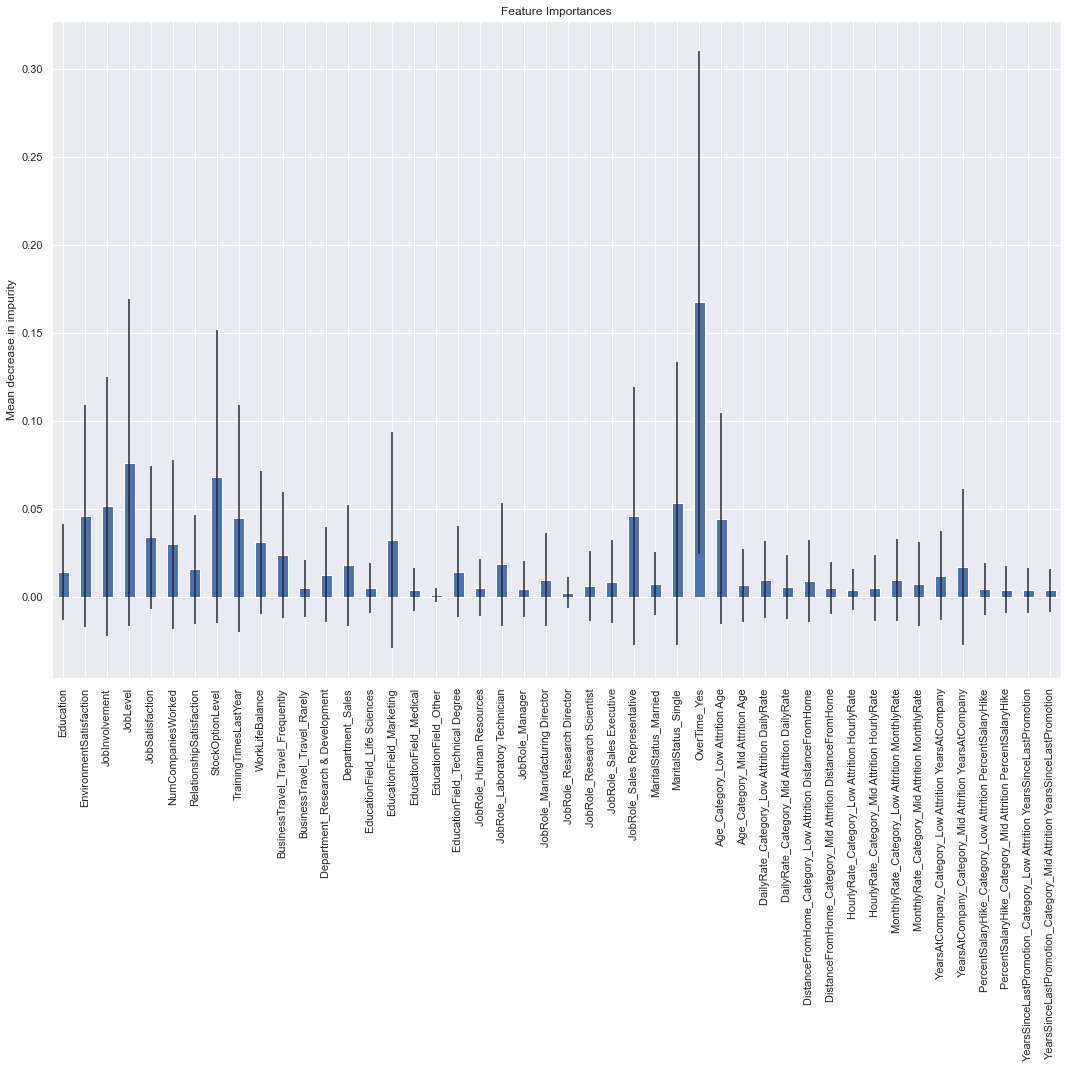

In [186]:
Model_importances(rfc,data_dum)

# Model Evaluation

In [98]:
y_pred_lr=lr.predict(X_val)
y_pred_dtc=dtc.predict(X_val)
y_pred_knc=knc.predict(X_val)
y_pred_svc=svc.predict(X_val)
y_pred_rfc=rfc.predict(X_val)
y_pred_gnb=gnb.predict(X_val)
y_pred_gbc=gbc.predict(X_val)
y_pred_sc=sc.predict(X_val)

In [99]:
from sklearn import metrics
from sklearn.metrics import confusion_matrix
# Structured data better to go with Accuracy Score
# UnStructured data better to go with Recall Score

In [100]:
print('Logistic Regression')
print("Accuracy:",metrics.accuracy_score(y_val, y_pred_lr))
print("Precision",metrics.precision_score(y_val,y_pred_lr))
print("Recall",metrics.recall_score(y_val,y_pred_lr))
print("f1_score",metrics.f1_score(y_val,y_pred_lr))

Logistic Regression
Accuracy: 0.8820861678004536
Precision 0.7777777777777778
Recall 0.45454545454545453
f1_score 0.5737704918032788


d:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


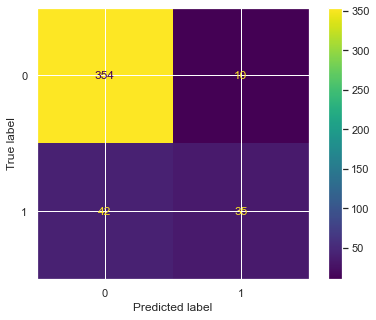

In [101]:
metrics.plot_confusion_matrix(lr,X_val,y_val)

In [102]:
print('Decision Tree Classifier')
print("Accuracy:",metrics.accuracy_score(y_val, y_pred_dtc))
print("Precision",metrics.precision_score(y_val,y_pred_dtc))
print("Recall",metrics.recall_score(y_val,y_pred_dtc))
print("f1_score",metrics.f1_score(y_val,y_pred_dtc))

Decision Tree Classifier
Accuracy: 0.8344671201814059
Precision 0.5909090909090909
Recall 0.16883116883116883
f1_score 0.2626262626262626


d:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


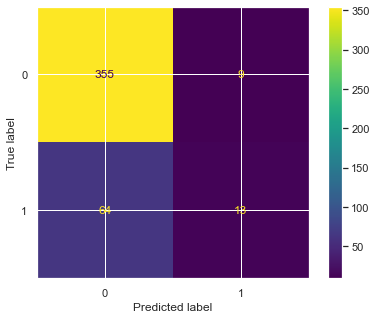

In [103]:
metrics.plot_confusion_matrix(dtc,X_val,y_val)

In [104]:
print('KNeighbors Classifier')
print("Accuracy:",metrics.accuracy_score(y_val, y_pred_knc))
print("Precision",metrics.precision_score(y_val,y_pred_knc))
print("Recall",metrics.recall_score(y_val,y_pred_knc))
print("f1_score",metrics.f1_score(y_val,y_pred_knc))

KNeighbors Classifier
Accuracy: 0.8299319727891157
Precision 1.0
Recall 0.025974025974025976
f1_score 0.05063291139240507


d:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


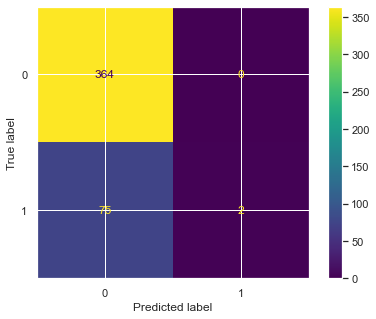

In [105]:
metrics.plot_confusion_matrix(knc,X_val,y_val)

In [106]:
print('Support Vector Classifier')
print("Accuracy:",metrics.accuracy_score(y_val, y_pred_svc))
print("Precision",metrics.precision_score(y_val,y_pred_svc))
print("Recall",metrics.recall_score(y_val,y_pred_svc))
print("f1_score",metrics.f1_score(y_val,y_pred_svc))

Support Vector Classifier
Accuracy: 0.8571428571428571
Precision 0.6206896551724138
Recall 0.4675324675324675
f1_score 0.5333333333333333


d:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


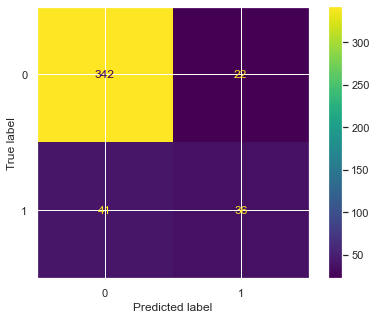

In [107]:
metrics.plot_confusion_matrix(svc,X_val,y_val)

In [108]:
print('Random Forest Classifier')
print("Accuracy:",metrics.accuracy_score(y_val, y_pred_rfc))
print("Precision",metrics.precision_score(y_val,y_pred_rfc))
print("Recall",metrics.recall_score(y_val,y_pred_rfc))
print("f1_score",metrics.f1_score(y_val,y_pred_rfc))

Random Forest Classifier

d:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1327: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))



Accuracy: 0.8253968253968254
Precision 0.0
Recall 0.0
f1_score 0.0


d:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


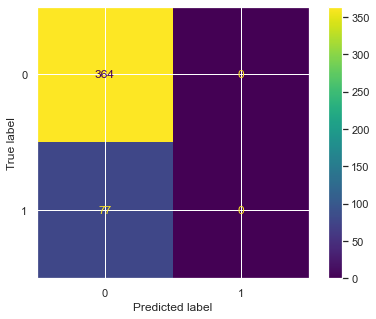

In [109]:
metrics.plot_confusion_matrix(rfc,X_val,y_val)

In [110]:
print('GaussianNB')
print("Accuracy:",metrics.accuracy_score(y_val, y_pred_gnb))
print("Precision",metrics.precision_score(y_val,y_pred_gnb))
print("Recall",metrics.recall_score(y_val,y_pred_gnb))
print("f1_score",metrics.f1_score(y_val,y_pred_gnb))

GaussianNB
Accuracy: 0.7278911564625851
Precision 0.35172413793103446
Recall 0.6623376623376623
f1_score 0.4594594594594595


d:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


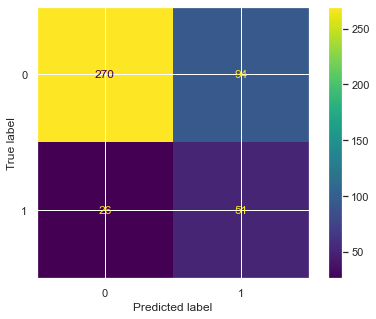

In [111]:
metrics.plot_confusion_matrix(gnb,X_val,y_val)

In [112]:
print('Gradient Boosting Classifier')
print("Accuracy:",metrics.accuracy_score(y_val, y_pred_gbc))
print("Precision",metrics.precision_score(y_val,y_pred_gbc))
print("Recall",metrics.recall_score(y_val,y_pred_gbc))
print("f1_score",metrics.f1_score(y_val,y_pred_gbc))

Gradient Boosting Classifier
Accuracy: 0.8684807256235828
Precision 0.7317073170731707
Recall 0.38961038961038963
f1_score 0.5084745762711864


d:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


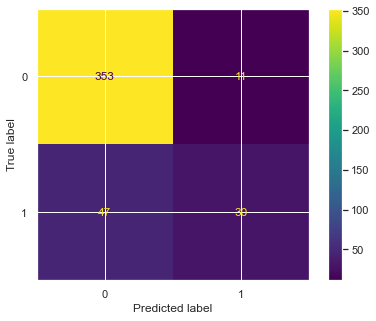

In [113]:
metrics.plot_confusion_matrix(gbc,X_val,y_val)

In [114]:
print('Stacking Classifier')
print("Accuracy:",metrics.accuracy_score(y_val, y_pred_sc))
print("Precision",metrics.precision_score(y_val,y_pred_sc))
print("Recall",metrics.recall_score(y_val,y_pred_sc))
print("f1_score",metrics.f1_score(y_val,y_pred_sc))

Stacking Classifier
Accuracy: 0.8594104308390023
Precision 0.7142857142857143
Recall 0.3246753246753247
f1_score 0.44642857142857145


d:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


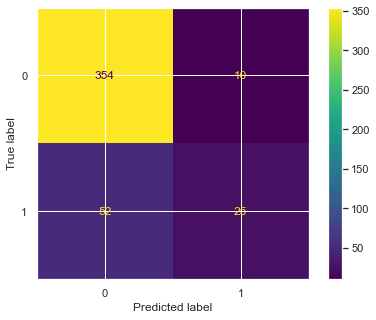

In [115]:
metrics.plot_confusion_matrix(sc,X_val,y_val)

# Deployment

In [116]:
# Good Accuracy and Precision
# Better recall should be considered as this is Attrition Dataset

In [117]:
import pickle

p_clf = lr
pfi_dump = pickle.dumps(p_clf)
pfi_load = pickle.loads(pfi_dump)